# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an ateempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

I am going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given  clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository

There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, continue to pursue the project

## 4. Features
This is where different information about each of the features in the data. This was collated by doing my own research or talking to a subject matter expert (someone who knows about the data set)

## Data dictionary

- **age** — Age in years  
- **sex** — Sex (1 = male; 0 = female)  
- **cp** — Chest pain type:
  - 0: Typical angina — chest pain due to decreased blood supply to the heart
  - 1: Atypical angina — chest pain not related to heart
  - 2: Non‑anginal pain — typically esophageal spasms (non‑heart related)
  - 3: Asymptomatic — chest pain without clear disease signs
- **trestbps** — Resting blood pressure (mm Hg on admission). Values >130–140 may be concerning.  
- **chol** — Serum cholesterol (mg/dL). Approx: LDL + HDL + 0.2 * triglycerides. Values >200 may be concerning.  
- **fbs** — Fasting blood sugar > 120 mg/dL (1 = true; 0 = false). >126 mg/dL indicates diabetes.  
- **restecg** — Resting electrocardiographic results:
  - 0: Normal
  - 1: ST‑T wave abnormality (range: mild → severe)
  - 2: Possible/definite left ventricular hypertrophy
- **thalach** — Maximum heart rate achieved  
- **exang** — Exercise‑induced angina (1 = yes; 0 = no)  
- **oldpeak** — ST depression induced by exercise relative to rest (stress indicator)  
- **slope** — Slope of peak exercise ST segment:
  - 0: Upsloping (better response to exercise; uncommon)
  - 1: Flat (typical healthy)
  - 2: Downsloping (possible pathology)
- **ca** — Number of major vessels (0–3) visible on fluoroscopy (higher = more visible flow)  
- **thal** — Thallium stress test result:
  - 1, 3: Normal
  - 6: Fixed defect (old/stable)
  - 7: Reversible defect (stress‑induced impairment)
- **target** — Presence of heart disease (1 = disease, 0 = no disease)

#

## Preparing the tools

Use pandas, matplotlib and NumPy for data analysis and manipulation

In [192]:
# Import all the tools 

# EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# To have all the plots appear inside the notebook
%matplotlib inline 

# Model for Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform

# Saving Model
import joblib




# Load Data

In [143]:
# To load the data

data = pd.read_csv("data/heart-disease-UCI.csv")
data.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    1. What question(s) are you trying to solve?
    2. What kind of data do we have and how do we treat different types?
    3. What's missing from the data and how do you deal with it?
    4. Where are the outliers and why should you care about them?
    5. How can you add, change or remove features to get more out of your data?

In [144]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [145]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [193]:
# Check how many counts of target are there

target_count = data["target"].value_counts()
target_count

target
1    165
0    138
Name: count, dtype: int64

Looking at the target count, we have 138 counts of No Heart Disease and 165 counts of Heart Disease. To see this result visually, I decided to use a bar graph

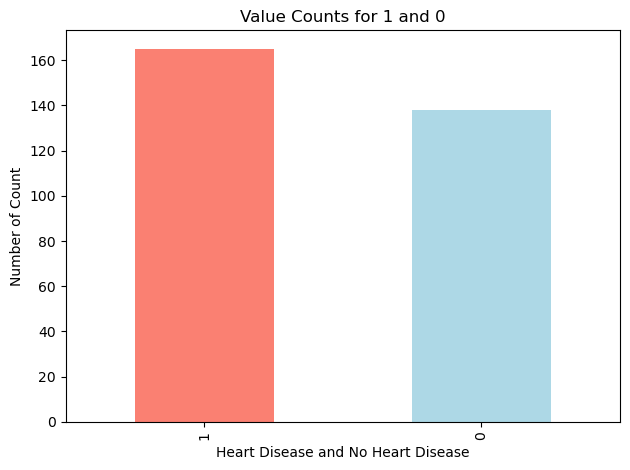

In [147]:
target_count.plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Value Counts for 1 and 0")
plt.xlabel("Heart Disease and No Heart Disease")
plt.ylabel("Number of Count")
plt.tight_layout()
plt.show()

I inspected column data types and checked for missing values to decide whether encoding and other data cleaning were required.

In [148]:
# Look at information of the other columsn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [149]:
# Check if there is any missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [150]:
# Find out more information about the dataframe
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns

### Heart Disease Frequency according to sex

In [194]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Looking at the data dictionary, I can see that there are 207 males and 96 females in this dataset. From there, I decided to do a crosstab with target to identify how many males/females do actually have heart disease before showing it visually in a bar graph

In [152]:
# Compare target columns with sex columns

# pd.crosstab(data["sex"], data["target"])
pd.crosstab(data.sex, data.target)

target,0,1
sex,,
0,24,72
1,114,93


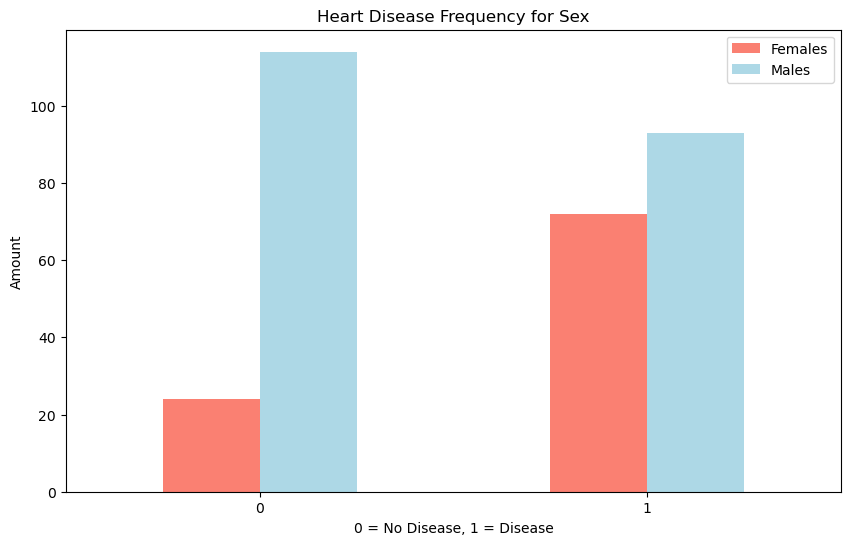

In [196]:
# To see the visual results with a bar
pd.crosstab(data.target, data.sex).plot(kind="bar",
                                        color=["salmon", "lightblue"],
                                        figsize=(10,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(labels=["Females","Males"])
plt.xticks(rotation=0)
plt.tight_layout
plt.show()

From the bar graph and crosstab, I can identify that:

Females: 24 (No Heart Disease), 72 (Heart Disease)
Male: 114 (No Heart Disease), 93 (Heart Disease)

## Age vs Max Heart Rate for Disease

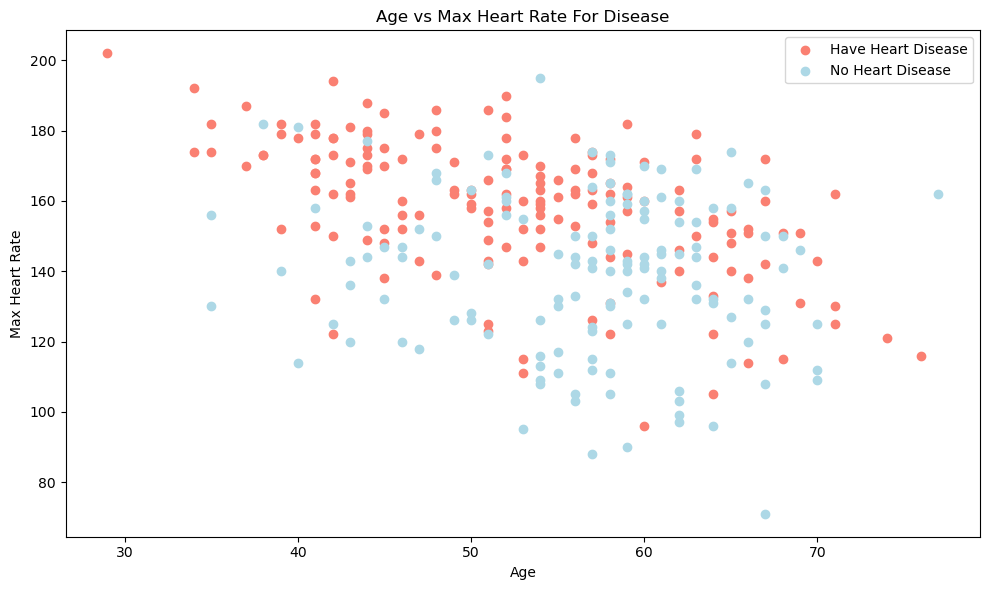

In [154]:
# Create the figure
plt.figure(figsize=(10, 6))

# Scatter plot with positive 
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           color="salmon",
           label="Have Heart Disease")

# Scatter plot with negative
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           color="lightblue",
           label="No Heart Disease")

plt.title("Age vs Max Heart Rate For Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.tight_layout()
plt.show()

From this graph, I can identify that:

1.  There is a clear negative trend, where the max heart rate(thalach) decreases with age for everyone (Max Heart Rate = 220 - age pattern)

2. Both classes overlap heavilty across ages 40-70 and thalach ~130-170.

3. Disease cases seems to appear more often at lower thalach, but this need to be confirmed.

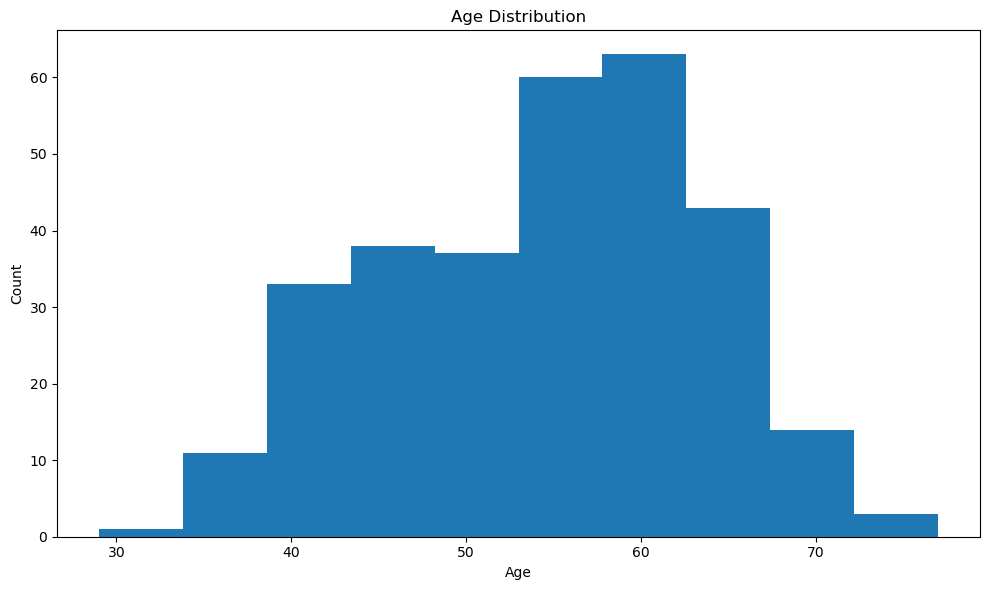

In [198]:
# Check the distribution of the age column with a histogram

plt.figure(figsize=(10,6))

plt.hist(data.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

From the histogra, the unimodal distribution is centered around mid-50s to early-60s. There are however fewer samples under ~4- and over ~70.

There is also a rough bell-shape with a slight right tail (older ages). This might mean that the models will learn mostly from ages 45-65 with the performance at <40 or >70 may be less stable

## Heart Disease frequency per chest pain type

    cp - Chest Pain Type:
        0: Typical angina (chest pain)
        1: Atypical angina (chest pain not related to heart)
        2: Non-anginal pain (typically esophageal spasms (non heart related)
        3: Asymptomatic (chest pain not showing signs of disease)

In [199]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


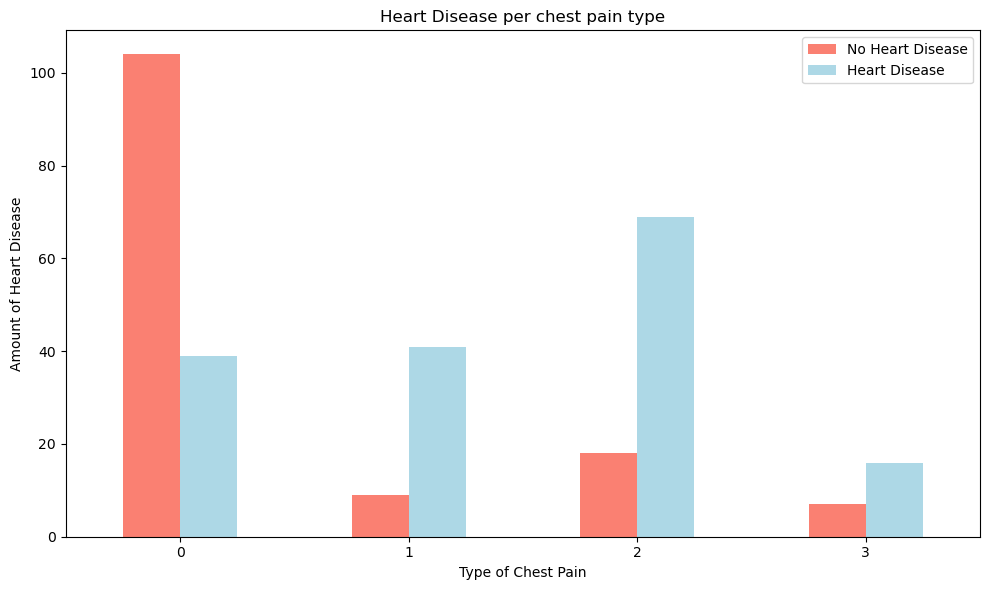

In [200]:
### Heart Disease frequence per chest pain type

pd.crosstab(data.cp, data.target).plot(kind="bar",
                                      color=["salmon","lightblue"],
                                      figsize=(10,6))

plt.title("Heart Disease per chest pain type")
plt.xlabel("Type of Chest Pain")
plt.xticks(rotation=0)
plt.ylabel("Amount of Heart Disease")
plt.legend(labels=["No Heart Disease", "Heart Disease"])
plt.tight_layout()
plt.show()

This shoes that with typical Angina, there is more patients who do not have heart disease. However as the table moves up from atypical agina to asympotatic (cp = 1-3), there are more people with heart disease as compared to no heart disease. This represent that the signal is strong and the cp is a useful predictor

In [201]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


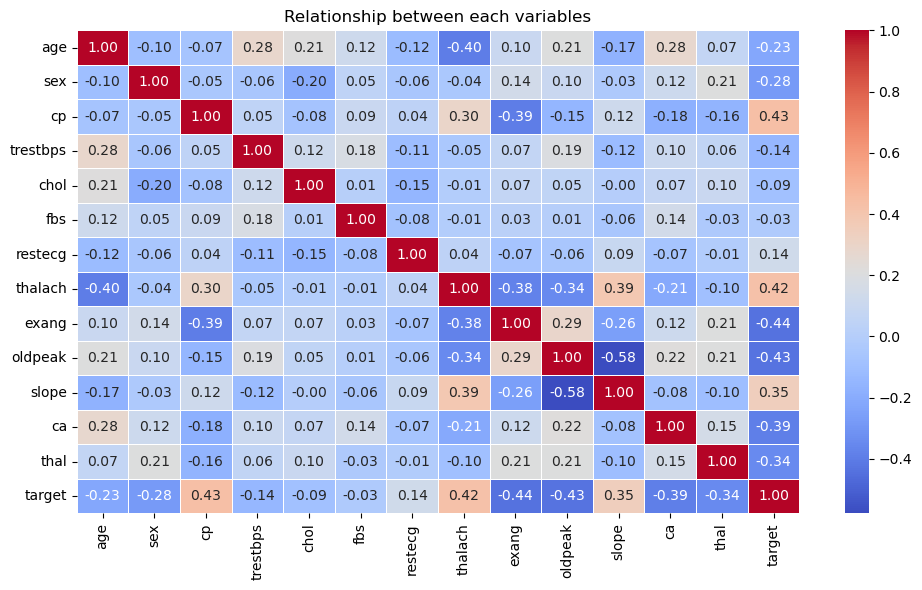

In [159]:
# Plotting out a correlation matrix to see how each variables interact with the other

correlation_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 cmap="coolwarm",
                 fmt=".2f",
                 linewidths=.5)

plt.title("Relationship between each variables")
plt.tight_layout()
plt.show()

This shows that in the positive correlation (higher values more associated with disease):
. cp (chest pain type): +0.43
. thalach (max heart rate): +0.42
. slope (ST slope): +0.35
. restecg: +0.14

In Negative (Higher values more associated with no disease):
.exang (exercise‑induced angina): −0.44
.oldpeak (ST depression): −0.43
.ca (num. of major vessels): −0.39
.thal (stress test result): −0.34
.sex: −0.28
.age: −0.23
.trestbps: −0.14
.chol: −0.09
.fbs: −0.03

This means that most signal comes from stress-test related variables.

# 5. Modelling

In [160]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
# Split the data to X and y features
X = data.drop("target", axis=1)
y = data.target

In [162]:
# Split to 80-10-10 for training, validation and test split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                            y,
                                                            test_size=0.1,
                                                            random_state=42,
                                                            stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                 y_train_val,
                                                 test_size=1/9,
                                                 random_state=42,
                                                 stratify=y_train_val)

In [163]:
len(X_train), len(X_val), len(X_test)

(241, 31, 31)

In [164]:
len(data)

303

Now that the data split into training and test sets is ready, I will build a machine learning model. Then I'll train it (find the patterns) on the training set.

Afterwards, I'll validate it on the validation set before testing it on the test set.

I'll be trying 3 different machine learning models:

    1.Logistic Regression
    2.K-Nearest Neighbours Classifier
    3.Random Forest Classifier

In [165]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression())
    ]),
    "K-Nearest Neighbours Classifier": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier())
    ]),
    "Random Forest Classifier": RandomForestClassifier()
}

# Cross Val Score

print("--- Cross Validation Scores before fitting---")
for name, model in models.items():
    scores=cross_val_score(model, X, y, cv=5)
    print(f"{name} 5-fold CV accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

def evaluation_model(models, X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Evaluating the data with the 3 machine learning models:
    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier
    """
    np.random.seed(42)  # for reproducibility

    # Dictionary to append model scores
    model_score = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        val_score   = model.score(X_val, y_val)
        test_score  = model.score(X_test, y_test)

        model_score[name] = {
            "train_score": train_score,
            "val_score": val_score,
            "test_score": test_score
        }

    return model_score

--- Cross Validation Scores before fitting---
Logistic Regression 5-fold CV accuracy: 0.835 ± 0.041
K-Nearest Neighbours Classifier 5-fold CV accuracy: 0.815 ± 0.051
Random Forest Classifier 5-fold CV accuracy: 0.825 ± 0.044


Before doing evaluation of the models, there are no clear winner as the means differ by ~0.01-0.02. There is moderate variance, which indicates fold-to-fold variablity. All models are well under the 0.95 target, which means more tuning is needed.

In [166]:
model_score = evaluation_model(models=models,
                               X_train=X_train,
                               X_val=X_val,
                               X_test=X_test,
                               y_train=y_train,
                               y_val=y_val,
                               y_test=y_test)
model_score

{'Logistic Regression': {'train_score': 0.8423236514522822,
  'val_score': 0.9032258064516129,
  'test_score': 0.7096774193548387},
 'K-Nearest Neighbours Classifier': {'train_score': 0.8755186721991701,
  'val_score': 0.8387096774193549,
  'test_score': 0.7419354838709677},
 'Random Forest Classifier': {'train_score': 1.0,
  'val_score': 0.9354838709677419,
  'test_score': 0.8064516129032258}}


## Model Comparison

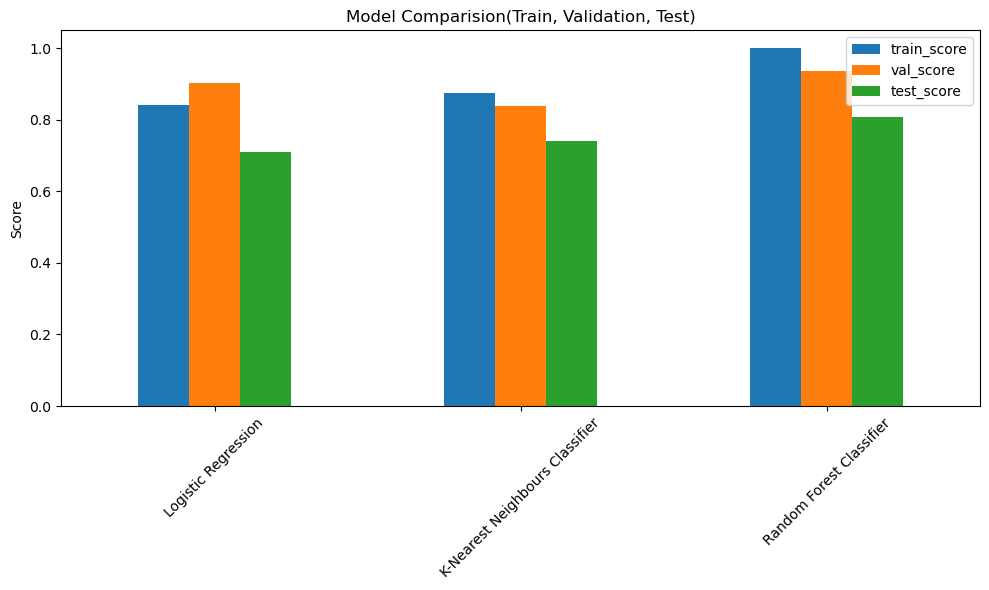

In [167]:
scores_df = pd.DataFrame(model_score).T
scores_df.plot(kind="bar",
               figsize=(10,6))

plt.title("Model Comparision(Train, Validation, Test)")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.tight_layout()
plt.show()

Results:
. Logistic Regression: Unstable generalization. Validation fold was too optimistic as the test drop sharply. Most likely underfitting

. KNN: Slightly overfitting, fairly stable but lowest overall.

. Random Forest: Classic overtraining as there is 1.0, which means perfect training. Accuracy is the best among the three models at 0.806, but still under the 0.95 goal.

From these results, I will be proceeding to tune the Random Forest Model.

Now I have a baseline model, I will do the following methods. However as this is my first time trying out the KNeighborsClassifier, I would like to try and tune the neighbours to see whether any improvements can be made

These are the following tuning methods I will perform:

    Hypyterparameter tuning - All Models
    Feature importance - All Models
    Confusion matrix - Classification
    Cross-validation - Classification
    Precision - Classification
    Recall - Classification
    F1 score - Classification
    Classification report - Classification
    ROC curve - Classification
    Area under the curve (AUC) - Classification

## Hyperparameter Tuning

In [187]:
# Tuning KNN

np.random.seed(42)

train_score = []
test_score = []

# Adjust neighbours
neighbours = range(1,21)

# Instantiate Model

for i in neighbours:
    pipe=Pipeline([
        ("scaler",StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=i))
    ])
    pipe.fit(X_train, y_train)
    train_score.append(pipe.score(X_train, y_train))
    test_score.append(pipe.score(X_test, y_test))

train_score

[1.0,
 0.8796680497925311,
 0.8796680497925311,
 0.8547717842323651,
 0.8755186721991701,
 0.8547717842323651,
 0.8672199170124482,
 0.8630705394190872,
 0.8589211618257261,
 0.8506224066390041,
 0.8713692946058091,
 0.8630705394190872,
 0.8547717842323651,
 0.8547717842323651,
 0.8630705394190872,
 0.8589211618257261,
 0.8506224066390041,
 0.8589211618257261,
 0.8464730290456431,
 0.8464730290456431]

In [188]:
test_score

[0.7096774193548387,
 0.7741935483870968,
 0.7096774193548387,
 0.7419354838709677,
 0.7419354838709677,
 0.8064516129032258,
 0.7419354838709677,
 0.7741935483870968,
 0.8064516129032258,
 0.7741935483870968,
 0.7419354838709677,
 0.7419354838709677,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7419354838709677,
 0.7096774193548387,
 0.7096774193548387]

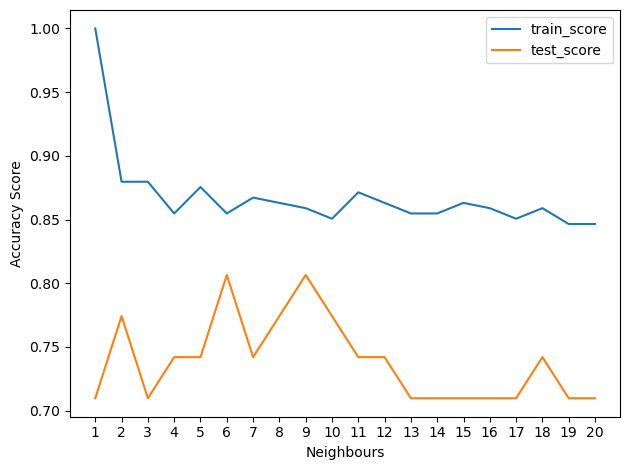

Maximum KNN score on the test data: 80.65%
Best amounts of KNN Neighbors on the test data: 6


In [202]:
plt.plot(neighbours, train_score, label="train_score")
plt.plot(neighbours, test_score, label="test_score")
plt.xticks(range(1,21,1))
plt.xlabel("Neighbours")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

# Show the best index 
best_index = np.argmax(test_score)
best_k = neighbours[best_index]

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")
print(f"Best amounts of KNN Neighbors on the test data: {best_k}")


Even though the best parameter for neighbours was 6 and the score went up from 0.741 to 0.865, the accuracy is still well short of the goal of 0.95.

## Hyperparameter Tuning with RandomizedSearchCV for Logistic Regression and RandomForestClassifier

In [171]:
# Parameters for Logistic Regression

logr_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

logr_params = {
    "logreg__solver": ["liblinear"],
    "logreg__C": np.logspace(-3, 3, 50),
}

In [172]:
# Set Random Seed
np.random.seed(42)

# Turning with RandomizedSearchCV
logr_rs = RandomizedSearchCV(
    estimator=logr_pipe,
    param_distributions=logr_params,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1,
)

# Fit random hyperparamter search model for Logisitic Regression
logr_rs.fit(X_train, y_train)

# Best parameters
logr_best_params = logr_rs.best_params_
print(f"Best Params: {logr_best_params}")

# Best cross-validation score
logr_cv_score = logr_rs.best_score_
print(f"Best CV Score: {logr_cv_score}")

# Score on Validation Set
logr_val_score = logr_rs.score(X_val, y_val)
print(f"Best Validation Score: {logr_val_score}")

# Score on Testing Set
logr_test_score = logr_rs.score(X_test, y_test)
print(f"Best Testing Score: {logr_test_score}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'logreg__solver': 'liblinear', 'logreg__C': np.float64(0.009540954763499945)}
Best CV Score: 0.8423469387755101
Best Validation Score: 0.8709677419354839
Best Testing Score: 0.7096774193548387


Looking at the performance after tuning Logistic Regression, the validation is still overly optimistic as the test dropped sharply, indicating instability across the splits.

In [173]:
# Parameters for Random Forest Tuning

rfc_params = {
    "n_estimators":randint(50,500),
    "max_depth":randint(1,20),
    "min_samples_split":randint(2,10),
    "min_samples_leaf":randint(1,4)
}

In [ ]:
# Tuning Random Forest Classifier

# Set Random Seed
np.random.seed(42)

# Turning with RandomizedSearchCV
rfc = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                        param_distributions=rfc_params,
                         n_iter=100,
                         cv=5,
                         scoring="accuracy",
                         random_state=42,
                         n_jobs=-1,
                        verbose=1)

# Fit model to training data
rfc.fit(X_train, y_train)

# Best parameters
rfc_best_params = rfc.best_params_
print(f"Best Testing Score: {rfc_best_params}")

# Best cross validation
rfc_cv_score = rfc.best_score_
print(f"Best CV Score: {rfc_cv_score}")

# Best validation score
rfc_val_score = rfc.score(X_val, y_val)
print(f"Best validation score: {rfc_val_score}")

# Best test score
rfc_test_score = rfc.score(X_test, y_test)
print(f"Best testing score: {rfc_test_score}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Testing Score: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 435}
Best CV Score: 0.8508503401360544
Best validation score: 0.8709677419354839
Best testing score: 0.7419354838709677


From this result, we can interpret:

LR: test–cv ≈ −0.132, test–val ≈ −0.161
RF: test–cv ≈ −0.109, test–val ≈ −0.129

This shows that the Random Forest is more stable across the splits and holds up better on unseen data due to a higher CV and test accuracy.


## Hyperparamter Tuning with GridSearchCV

In [207]:
# Using RandromForestClassifier, will tune with GridSearchCV
# Do not use randint as GSV needs explict list of values

grid = {
    "n_estimators": [350, 400, 435, 450, 500],
    "max_depth": [2, 3, 4, 6],
    "min_samples_split": [5, 6, 7, 8, 9],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt", "log2", 0.6, 0.8]
}

In [ ]:
# Set random seed
np.random.seed(42)

# Instantiate the GridSearchCV Object (Set random_state to 42 and RandomForest uses own RNG)
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=grid,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# Fit the Object to the training set
grid_rf.fit(X_train, y_train)

# Best param
grid_rf_best_params = grid_rf.best_params_
print(f"Best parameter with GridSearchCV: {grid_rf_best_params}")

# Best cross validation score
grid_rf_best_score = grid_rf.best_score_
print(f"Best CV score: {grid_rf_best_score}")

# Validation Score
grid_rf_val_score = grid_rf.score(X_val, y_val)
print(f"Best Validation score: {grid_rf_val_score}")

# Testing Score
grid_rf_test_score = grid_rf.score(X_test, y_test)
print(f"Best Test score: {grid_rf_test_score}")

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


From the results:

Performance (Accuracy):
RF (Grid): CV=0.854, Val=0.871, Test=0.742
RF (Randomized): CV=0.851, Val=0.871, Test=0.742
LR (Randomized): CV=0.842, Val=0.871, Test=0.710

Generalization gaps (test–cv, test–val):
RF (Grid): ≈ −0.117, −0.129
RF (Randomized): ≈ −0.109, −0.129
LR: ≈ −0.132, −0.161

Both RF searches perform similarly on Test. GridSearch Test-CV gap is still larger than RandomizedSearch. However this still fall short of the 0.95 goal set earlier 

# Evaluting our tuned machine learning classifier, beyond accuracy


    ROC curve and AUC score
    Confusion matrix
    Classification report
    Precision
    Recall
    F1-score
    Cross-Validation

To make comparisons and evaluate our trained model, first we need to make predictions.

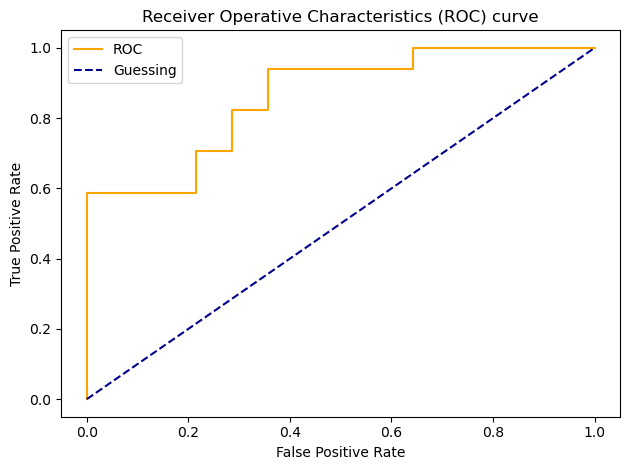

AUC: 0.861


In [ ]:
# ROC Curve

np.random.seed(42)

# Instantiate RandomForestCurve with best params
clf =  grid_rf.best_estimator_

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_positive_probs = y_probs[:,1]

# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, threshold = roc_curve(y_test, y_positive_probs)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,
             tpr,
             color="orange",
             label="ROC")
    plt.plot([0,1],
            [0,1],
            color="darkblue",
            linestyle="--",
            label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operative Characteristics (ROC) curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_roc_curve(fpr, tpr)

# To see AUC Score
auc = roc_auc_score(y_test, y_positive_probs)
print(f"AUC: {auc:.3f}")

The ROC Curve bows towards the top-left, meaning tha the model has a high sensitivity with relatively low false positives. This means that it is able to catch more positives rather than creating more false alarms. With an AUC of 0.861, it means that the model is good at ranking cases. Essentially, it means that it will rank a random patient with disease higher than a random patient without disease about 86.1% of the time.

# Creating Confusion Matrix

In [ ]:
y_preds = clf.predict(X_test)
# confusion_matrix(y_test, y_preds)
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,7,7
1,1,16


<Figure size 1000x600 with 0 Axes>

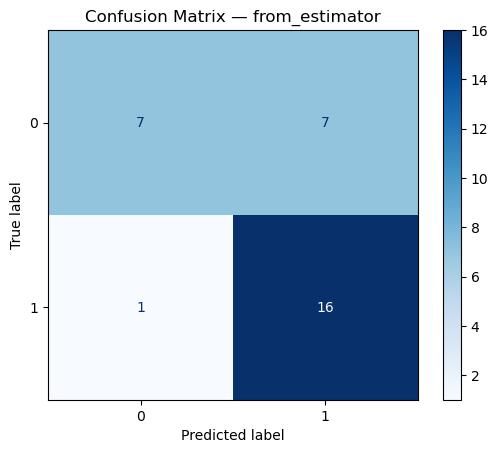

In [ ]:
# Custom function for Confusion Matrix

def Confusion_Matrix_Display(y_test, y_preds):
    plt.figure(figsize=(10,6))
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                          display_labels=[0,1],
                                          cmap="Blues",
                                          normalize=None)
    plt.title("Confusion Matrix — from_estimator")
    plt.show()

Confusion_Matrix_Display(y_test, y_preds)

# Classification Report

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [180]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.73      0.94      0.82        17

    accuracy                           0.77        31
   macro avg       0.81      0.76      0.76        31
weighted avg       0.80      0.77      0.76        31



# Evaluating the model

In [181]:
# Custom function to do evaluation

def evaluate_predictions(y_test, y_preds):
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

    print(f"Accuracy Score: {accuracy *100:.2f}%")
    print(f"Precision Score: {precision*100:.2f}%")
    print(f"Recall Score: {recall*100:.2f}%")
    print(f"f1 Score: {f1*100:.2f}%")


In [182]:
# Evaluating validation set

y_preds = clf.predict(X_val)
print("--- Evaluation of Validation Test Set ---")
evaluate_predictions(y_val, y_preds)


--- Evaluation of Validation Test Set ---
Accuracy Score: 87.10%
Precision Score: 80.95%
Recall Score: 100.00%
f1 Score: 89.47%


In [183]:
# Evaluating Test set

y_preds = clf.predict(X_test)
print("--- Evaluation of Test Set ---")
evaluate_predictions(y_test, y_preds)

--- Evaluation of Test Set ---
Accuracy Score: 77.42%
Precision Score: 72.73%
Recall Score: 94.12%
f1 Score: 82.05%


# Trying out feature importance


Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our RandeomForestClassifier model...


In [184]:
print(f"model score on training data: {clf.score(X_train, y_train)}")
print(f"model score on testing data: {clf.score(X_test, y_test)}")

model score on training data: 0.9045643153526971
model score on testing data: 0.7741935483870968


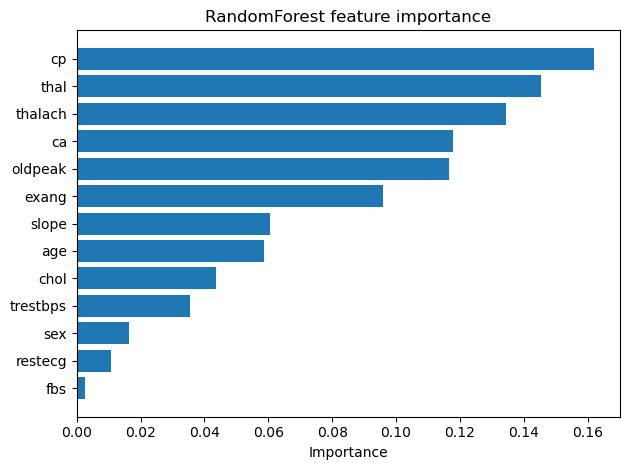

In [185]:
importances = clf.feature_importances_

indices=np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_title("RandomForest feature importance")
ax.set_xlabel("Importance")
plt.tight_layout()
plt.show()

In [190]:
# Cross-Validation for Final Model (Random Forest Classifier)

np.random.seed(42)

print("--- Cross Validation Scores for Random Forest Classifier---")
scores=cross_val_score(clf, X, y, cv=5)
print(f"Random Forest Classifier 5-fold CV accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

--- Cross Validation Scores for Random Forest Classifier---
Random Forest Classifier 5-fold CV accuracy: 0.838 ± 0.036


# Saving Model

In [ ]:
joblib.dump(clf, "best_random_forest_model.joblib")